In [ ]:
#Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##Input Temperature T in K

In [ ]:
T = float(input("Enter a particular value of temperature in K : "))

Enter a particular value of temperature in K : 1023


##Calculating values of ΔG = ΔH - TΔS : 11 chemical reactions

In [ ]:
def delta_g(t):
  c = -0.05223316034/t#constant part in calculation of log k where k is equilibrium constant
  #Substituting values of delta H and delta S
  g_jg = 1000*(-721.45-(t*-0.3673))
  c_jg = g_jg*c
  g_gi = 1000*(-295.96-(t*-0.0169))
  c_gi = g_gi*c
  g_gc = 1000*(-1146.94-(t*-0.7516))
  c_gc = g_gc*c
  g_bc = 1000*(-371.36-(t*-0.0739))
  c_bc = g_bc*c
  g_cd = 1000*(-775.58-(t*-0.6776))
  c_cd = g_cd*c
  g_ab = 1000*(-170.71-(t*-0.0765))
  c_ab = g_ab*c
  g_hb = 1000*(-200.66-(t*0.0025))
  c_hb = g_hb*c
  g_dk = 1000*(-315.53-(t*-0.2894))
  c_dk = g_dk*c
  g_de = 1000*(-460.04-(t*-0.3882))
  c_de = g_de*c
  g_el = 1000*(-320.37-(t*-0.2794))
  c_el = g_el*c
  g_ef = 1000*(-139.68-(t*-0.1088))
  c_ef = g_ef*c
  return c_jg,c_gi,c_gc,c_bc,c_cd,c_ab,c_hb,c_dk,c_de,c_el,c_ef


In [ ]:
#Storing 11 logarithm of equilibrium constants of different reactions
log_k = delta_g(T)
print(log_k)

(17.65113706664195, 14.228624335343344, 19.302945662414555, 15.101168301179378, 4.207000677269179, 4.7204123069532455, 10.376043266269745, 0.9943090105856217, 3.21218107860594, 1.7637652435512157, 1.4489264231323409)


##Calculation and assignment of slope and intercept using ΔGᵒ and T : 11 line equations

In [ ]:
y=[]
y.append(log_k[0])
m_gi = 1
y.append(log_k[1])
m_gc = -3
y.append(-log_k[2])
m_bc = 1.5
y.append(log_k[3])
m_cd = -0.75
y.append(-0.5*log_k[4])
y.append(log_k[5])
m_hb = 1
y.append(log_k[6])
m_dk = -0.5
y.append(-log_k[7])
m_de = -1
y.append(-log_k[8])
m_el = -0.5
y.append(-log_k[9])
y.append(log_k[10])

##Finding required 5 intersection points using f (x) - g (x) = 0 

In [ ]:
#gi and gc
p1 = np.roots([m_gi-m_gc,y[1]-y[2]])[0]
#gc and cd
p2 = np.roots([m_gc-m_cd,y[2]-y[4]])[0]
#cd and dk
p3 = np.roots([m_cd-m_dk,y[4]-y[7]])[0]
#de and el
p4 = np.roots([m_de-m_el,y[8]-y[9]])[0]
#hb and bc
p5 = np.roots([m_hb-m_bc,y[6]-y[3]])[0]

##Range of x-values for specfic line plot

In [ ]:
x_gi = np.linspace(-15,p1,100)
x_gc = np.linspace(p1,p2,100)
x_bc = np.linspace(p5,p2,100)
x_cd = np.linspace(p2,p3,100)
x_hb = np.linspace(-15,p5,100)
x_dk = np.linspace(p3,5,100)
x_de = np.linspace(p3,p4,100)
x_el = np.linspace(p4,5,100)
#Calculation of y co-ordinate of intersection points
y_1 = (1*p1)+y[1]
y_2 = (-3*p2)+y[2]
y_4 = (-0.5*p4)+y[9]
y_5 = (1*p5)+y[6]

##Labelled Plot

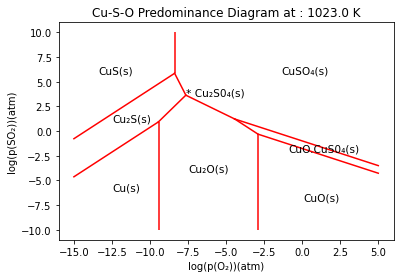

In [ ]:
#Line plot
plt.plot(x_gi,(1*x_gi)+y[1], 'red')
plt.plot(x_gc,(-3*x_gc)+y[2], 'red')
plt.plot(x_bc,(1.5*x_bc)+y[3], 'red')
plt.plot(x_cd,(-0.75*x_cd)+y[4], 'red')
plt.plot(x_hb,(1*x_hb)+y[6], 'red')
plt.plot(x_dk,(-0.5*x_dk)+y[7], 'red')
plt.plot(x_de,(-1*x_de)+y[8], 'red')
plt.plot(x_el,(-0.5*x_el)+y[9], 'red')
plt.vlines(x=p1,ymin = y_1,ymax = 10 ,color='red')
plt.vlines(x=-2*y[5],ymin = -10 ,ymax = y_5 , color='red')
plt.vlines(x=-2*y[10],ymin = -10,ymax = y_4, color='red')
#Text plot
plt.text(p1+7,y_1, u'CuSO\u2084(s)', fontsize = 10.5)
plt.text(p1-5,y_1, 'CuS(s)', fontsize = 10.5)
plt.text(p5-3,y_5, u'Cu\u2082S(s)', fontsize = 10.5)
plt.text(p5+2,y_5-5, u'Cu\u2082O(s)', fontsize = 10.5)
plt.text(p5-3,y_5-7, 'Cu(s)', fontsize = 10.5)
plt.text(p4+3,y_5-8, 'CuO(s)', fontsize = 10.5)
plt.text(p4+2,y_5-3, u'CuO.CuS0\u2084(s)', fontsize = 10.5)
plt.text(p2,y_2, u'* Cu\u2082S0\u2084(s)', fontsize = 10.5)
#Label plot
plt.xlabel(u'log(p(O\u2082))(atm)')#log(p(O2))(atm)
plt.ylabel(u'log(p(SO\u2082))(atm)')#log(p(SO2))(atm)
plt.title("Cu-S-O Predominance Diagram at : "+str(T)+" K")
plt.show()